In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [30]:
# Cargar los datos
data = pd.read_csv(r'C:\Users\Diego\OneDrive\Escritorio\DatosEvaluacion\diabetes_indiana.csv')


In [31]:
# Dividir los datos en características (X) y etiquetas (y)
X = data.iloc[:, 1:-1]  # Excluir la columna "Unnamed: 0" y la columna de etiquetas
y = data.iloc[:, -1]    # Última columna (etiquetas)

In [32]:
# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
# Crear y entrenar el modelo Gradient Boosting
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

GradientBoostingClassifier()

In [34]:
# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

In [35]:
# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)


In [36]:
# Imprimir métricas de evaluación
print(f'Precisión: {accuracy:.2f}')
print('Reporte de Clasificación:')
print(report)

Precisión: 0.74
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.81      0.78      0.79        99
           1       0.63      0.67      0.65        55

    accuracy                           0.74       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.74      0.74       154



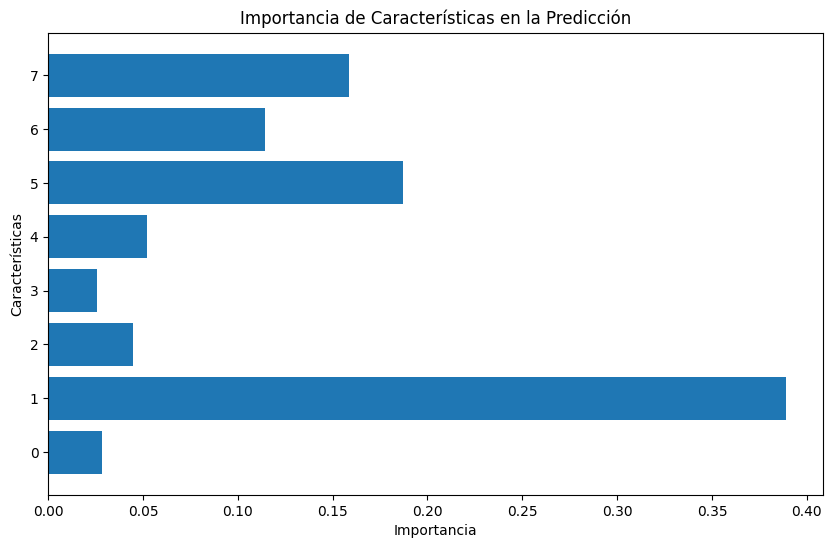

In [37]:
# Gráfica de importancia de características
feature_importances = model.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances)
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancia de Características en la Predicción')
plt.show()

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
# Definir los hiperparámetros a buscar
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}

In [40]:
# Crear el objeto GridSearchCV
grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5)

In [41]:
# Realizar la búsqueda de cuadrícula en los datos de entrenamiento
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 200]})

In [42]:
# Imprimir los resultados de la búsqueda de cuadrícula
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)
print("Mejor puntuación de validación cruzada:")
print(grid_search.best_score_)

Mejores hiperparámetros encontrados:
{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 50}
Mejor puntuación de validación cruzada:
0.7817273090763694


In [43]:
best_model = grid_search.best_estimator_

In [44]:
# Predecir en el conjunto de prueba con el mejor modelo
y_pred_best = best_model.predict(X_test)

In [45]:
# Evaluar el modelo ajustado
accuracy_best = accuracy_score(y_test, y_pred_best)
report_best = classification_report(y_test, y_pred_best)


In [46]:
# Imprimir métricas de evaluación para el mejor modelo
print(f'Precisión del mejor modelo: {accuracy_best:.2f}')
print('Reporte de Clasificación para el mejor modelo:')
print(report_best)

Precisión del mejor modelo: 0.75
Reporte de Clasificación para el mejor modelo:
              precision    recall  f1-score   support

           0       0.82      0.79      0.80        99
           1       0.64      0.69      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.74       154
weighted avg       0.76      0.75      0.76       154

